In [109]:
import pandas as pd

In [110]:
data=pd.read_csv('/content/UCI_Credit_Card.csv')

In [111]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
x=data.iloc[:,:-1]

In [114]:
x.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [115]:
y=data.iloc[:,-1:]

In [116]:
y.head(2)

,default.payment.next.month
0,1
1,1


In [117]:
x.shape

(30000, 24)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1221)

In [121]:
s=StandardScaler()

In [122]:
x_train_sc=s.fit_transform(x_train)

In [123]:
x_test_sc=s.transform(x_test)

In [124]:
import tensorflow

In [125]:
from tensorflow import keras

In [126]:
from tensorflow.keras import Sequential

In [127]:
from tensorflow.keras.layers import Dense

In [128]:
model=Sequential()

In [129]:
model.add(Dense(20,activation='relu',input_dim=24))
model.add(Dense(10,activation='relu',input_dim=20))
model.add(Dense(5,activation='relu',input_dim=10))
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(1,activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 20)                500       
                                                                 
 dense_30 (Dense)            (None, 10)                210       
                                                                 
 dense_31 (Dense)            (None, 5)                 55        
                                                                 
 dense_32 (Dense)            (None, 3)                 18        
                                                                 
 dense_33 (Dense)            (None, 1)                 4         
                                                                 
Total params: 787 (3.07 KB)
Trainable params: 787 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [132]:
x_sc=s.fit_transform(x)

In [133]:
history=model.fit(x_train_sc,y_train,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
1920/1920 [==============================] - 9s 4ms/step - loss: 0.4747 - accuracy: 0.7994 - val_loss: 0.4592 - val_accuracy: 0.8110
Epoch 2/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.4416 - accuracy: 0.8189 - val_loss: 0.4539 - val_accuracy: 0.8129
Epoch 3/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.4363 - accuracy: 0.8216 - val_loss: 0.4531 - val_accuracy: 0.8156
Epoch 4/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.4318 - accuracy: 0.8227 - val_loss: 0.4534 - val_accuracy: 0.8150
Epoch 5/100
1920/1920 [==============================] - 8s 4ms/step - loss: 0.4299 - accuracy: 0.8232 - val_loss: 0.4476 - val_accuracy: 0.8173
Epoch 6/100
1920/1920 [==============================] - 8s 4ms/step - loss: 0.4270 - accuracy: 0.8234 - val_loss: 0.4482 - val_accuracy: 0.8171
Epoch 7/100
1920/1920 [==============================] - 7s 3ms/step - loss: 0.4254 - accuracy: 0.8240 - val_loss: 0.4463 - val_ac

In [134]:
import matplotlib.pyplot as pl

In [135]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

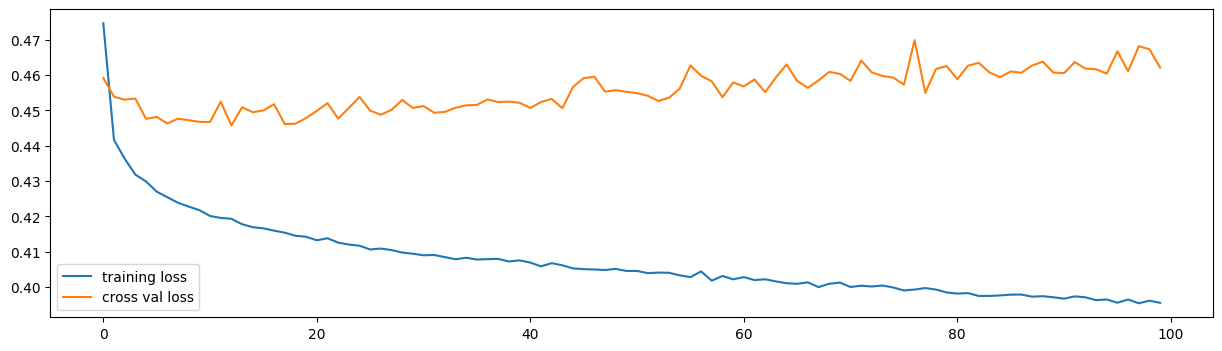

In [136]:
pl.figure(figsize=(15,4))
pl.plot(history.history['loss'],label='training loss')
pl.plot(history.history['val_loss'],label='cross val loss')
pl.legend()
pl.show()

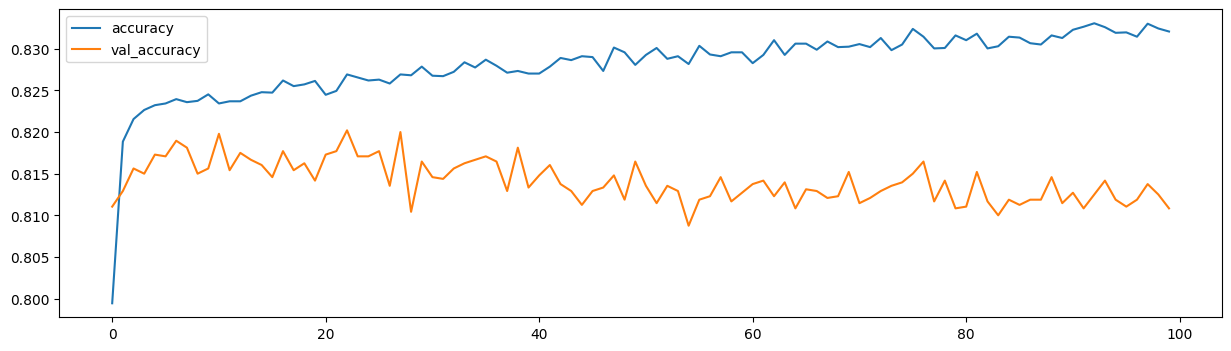

In [137]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [138]:
p=model.predict(x_test_sc)

188/188 [==============================] - 0s 2ms/step


In [139]:
from sklearn.metrics import roc_auc_score,roc_curve

In [140]:
fpr,tpr,thr=roc_curve(y_test,p)

In [141]:
import numpy as np

In [142]:
accuracy=[]
for i in thr:
  y_prd=np.where(p>i,1,0)
  x=accuracy_score(y_test,y_prd)
  accuracy.append(x)

In [143]:
d1=pd.DataFrame(thr,columns=["thresold"])

In [144]:
d2=pd.DataFrame(accuracy,columns=["accuracy_score"])

In [145]:
d=pd.concat([d1,d2],axis=1)

In [146]:
d.sort_values(by='accuracy_score',ascending=False).head(2)

,thresold,accuracy_score
263,0.540323,0.809
262,0.541977,0.809


In [147]:
p=np.where(p>.54,1,0)

In [148]:
accuracy_score(y_test,p)

0.8091666666666667